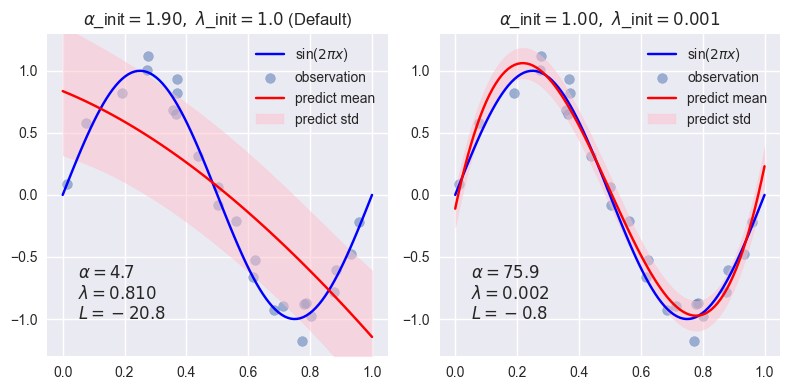

In [ ]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入贝叶斯岭回归模型
from sklearn.linear_model import BayesianRidge
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 生成y
def func(x):
    return np.sin(2 * np.pi * x)
# 样本量
size = 25
# 设置随机数种子
np.random.seed(1234)
# 训练集
x_train = np.random.uniform(0.0, 1.0, size)
y_train = func(x_train) + np.random.normal(scale=0.1, size=size)
# 测试集
x_test = np.linspace(0.0, 1.0, 100)
# 范德蒙行列式的阶数
n_order = 3
# 生成范德蒙矩阵的训练集
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
# 构建贝叶斯岭回归模型
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
# 开始绘图
fig, axes = plt.subplots(1, 2, figsize=(8, 4), tight_layout=True)
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        # 设置参数的初始值
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    # 模型拟合
    reg.fit(X_train, y_train)
    # 测试集上预测
    ymean, ystd = reg.predict(X_test, return_std=True)
    # 真实散点测试集，无噪声
    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    # 真实散点训练集，有噪声
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    # 测试集预测值
    ax.plot(x_test, ymean, color="red", label="predict mean")
    # 置信带
    ax.fill_between(
        x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std"
    )
    ax.set_ylim(-1.3, 1.3)
    # 设置图例
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.show()
fig.savefig("../codeimage/code23.pdf")
